# Data Undedrstanding (Before Pre-Processing)

<span style="font-size:20px; color:#06cda3;">Library Use</span>

In [64]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import missingno as msno
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

<span style="font-size:20px; color:#06cda3;">Import Dataset</span>

In [65]:
filepath = "C:\\Users\\Chai\\Desktop\\FYP_dataset\\Loan_Default.csv"
df = pd.read_csv(filepath)

<span style="font-size:20px; color:#06cda3;">Dataset Rows & Columns & Data Types</span>

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

<span style="font-size:20px; color:#06cda3;">Unique Values For Each Catagotical (Object Type) Column</span>

In [67]:
pd.Series({col: df[col].unique() for col in df.select_dtypes("object").columns})

loan_limit                                                      [cf, nan, ncf]
Gender                                [Sex Not Available, Male, Joint, Female]
approv_in_adv                                                [nopre, pre, nan]
loan_type                                                [type1, type2, type3]
loan_purpose                                             [p1, p4, p3, p2, nan]
Credit_Worthiness                                                     [l1, l2]
open_credit                                                        [nopc, opc]
business_or_commercial                                            [nob/c, b/c]
Neg_ammortization                                      [not_neg, neg_amm, nan]
interest_only                                              [not_int, int_only]
lump_sum_payment                                              [not_lpsm, lpsm]
construction_type                                                     [sb, mh]
occupancy_type                                      

<span style="font-size:20px; color:#06cda3;">Check Column Names</span>

In [68]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [69]:
missing_value_columns = df.isnull().sum()
missing_value_columns = missing_value_columns[missing_value_columns > 0]
print(missing_value_columns)

loan_limit                    3344
approv_in_adv                  908
loan_purpose                   134
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
property_value               15098
income                        9150
age                            200
submission_of_application      200
LTV                          15098
dtir1                        24121
dtype: int64


<span style="font-size:20px; color:#06cda3;">Analyzing Numerical Columns</span>

In [70]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


<span style="font-size:20px; color:#06cda3;">Data Distribution</span>
<span style="font-size:20px; color:#06cda3;">(For numeric columns)</span>

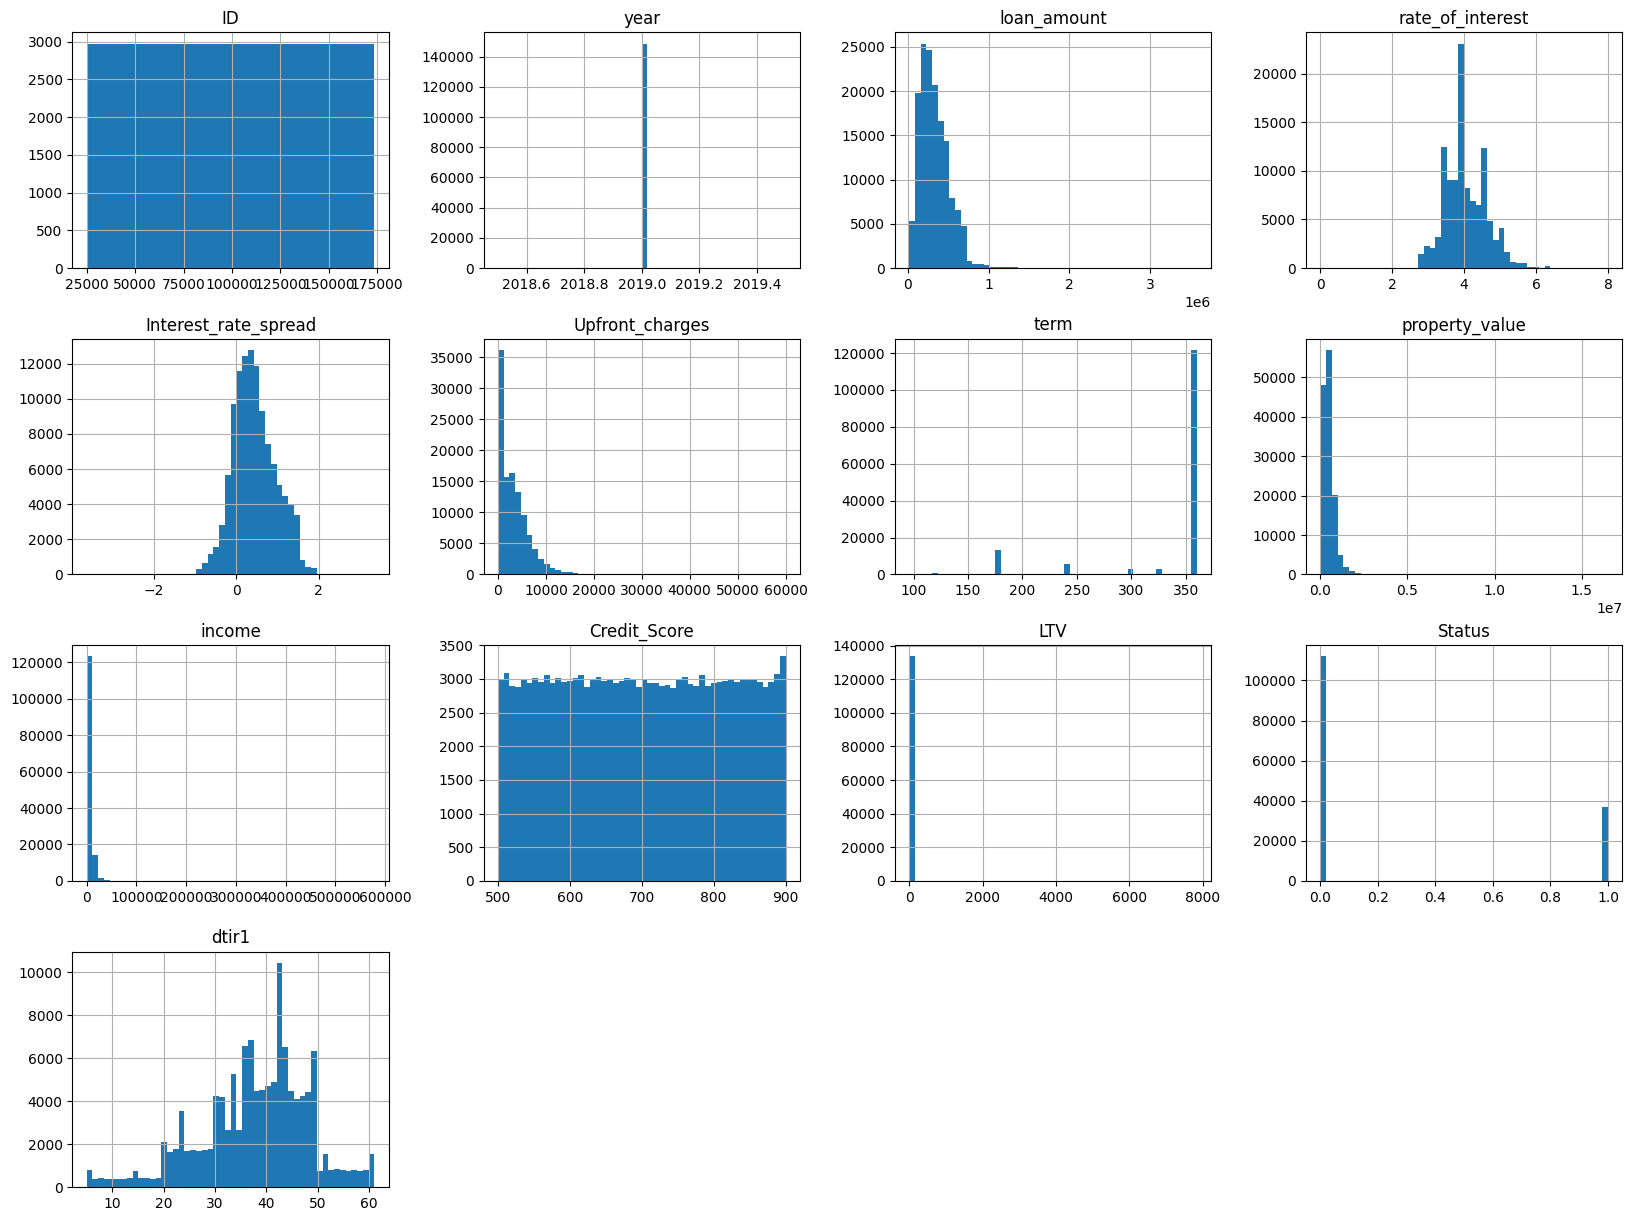

In [71]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

<span style="font-size:20px; color:#06cda3;">Pie Chart of 'Year' Column Distribution</span>

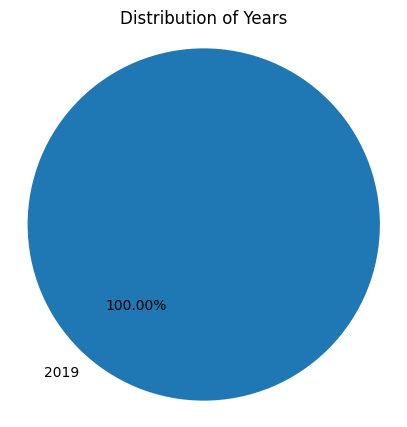

In [72]:
year_counts = df['year'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.2f%%', startangle=50)
plt.title('Distribution of Years')
plt.axis('equal')  
plt.show()

<span style="font-size:20px; color:#06cda3;">Box Plot of Loan Amount</span>

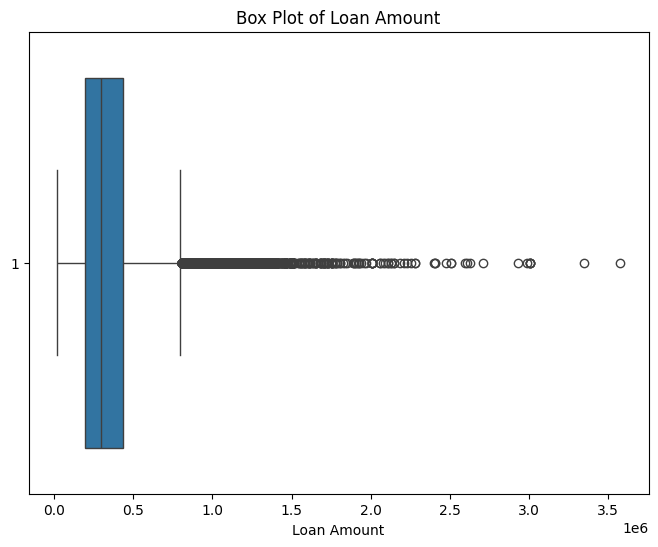

In [73]:
loan_amount_df = df[['loan_amount']]

plt.figure(figsize=(8, 6))
sns.boxplot(data=loan_amount_df, orient='h')  
plt.title('Box Plot of Loan Amount')
plt.xlabel('Loan Amount')
plt.yticks([0], ['1'])
plt.show()

<span style="font-size:20px; color:#06cda3;">Box Plot of Rate of Interest</span>

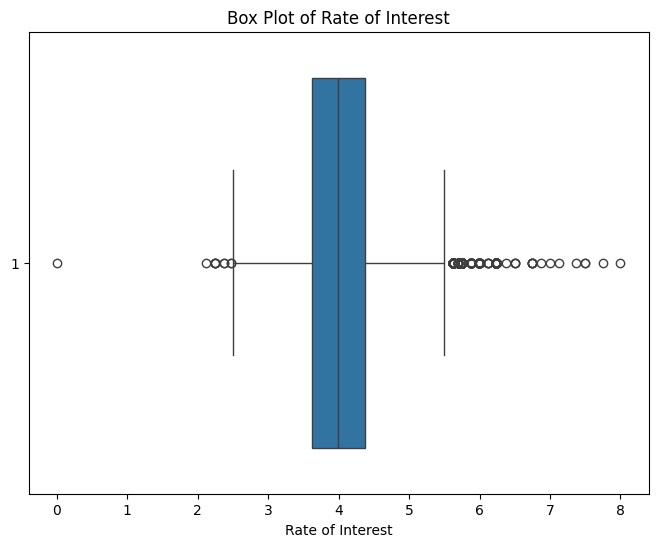

In [74]:
Rate_of_Interest_df = df[['rate_of_interest']]

plt.figure(figsize=(8, 6))
sns.boxplot(data=Rate_of_Interest_df, orient='h')  
plt.title('Box Plot of Rate of Interest')
plt.xlabel('Rate of Interest')
plt.yticks([0], ['1'])
plt.show()


<span style="font-size:20px; color:#06cda3;">Box Plot of Interest Rate Spread</span>

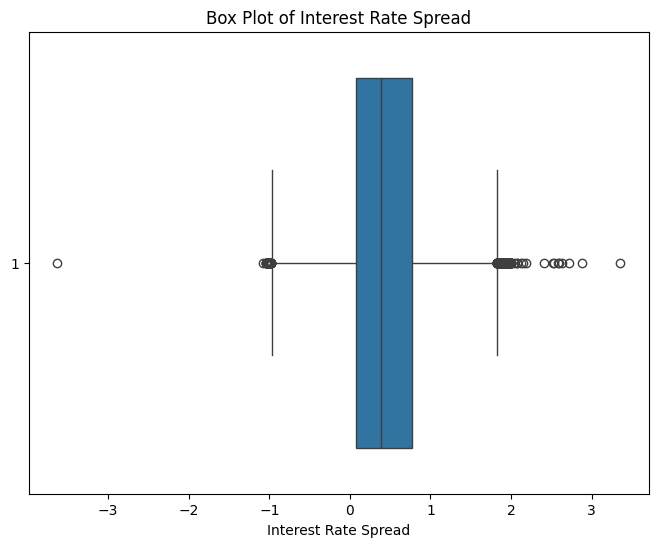

In [75]:
Interest_rate_spread_df = df[['Interest_rate_spread']]

plt.figure(figsize=(8, 6))
sns.boxplot(data=Interest_rate_spread_df, orient='h')  
plt.title('Box Plot of Interest Rate Spread')
plt.xlabel('Interest Rate Spread')
plt.yticks([0], ['1'])
plt.show()

<span style="font-size:20px; color:#06cda3;">Box Plot of Upfront Charges</span>

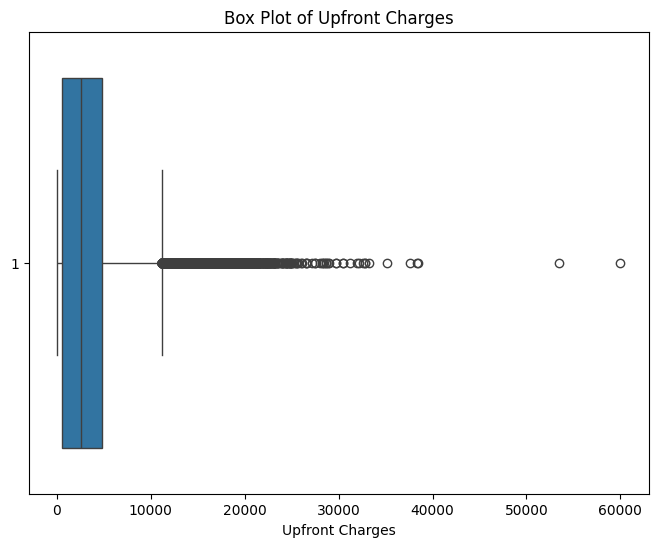

In [76]:
Upfront_charges_df = df[['Upfront_charges']]

plt.figure(figsize=(8, 6))
sns.boxplot(data=Upfront_charges_df, orient='h')  
plt.title('Box Plot of Upfront Charges')
plt.xlabel('Upfront Charges')
plt.yticks([0], ['1'])
plt.show()

<span style="font-size:20px; color:#06cda3;">Box Plot of Term (Months)</span>

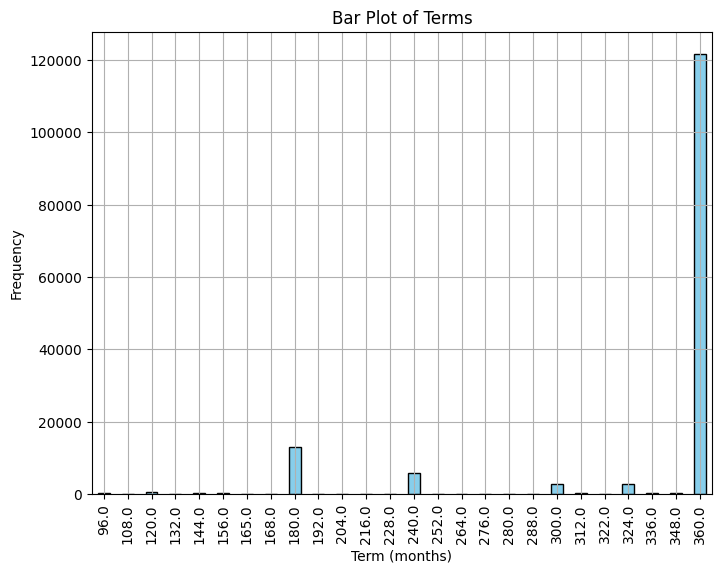

In [77]:
plt.figure(figsize=(8, 6))
df['term'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Plot of Terms')
plt.xlabel('Term (months)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<span style="font-size:20px; color:#06cda3;">Box Plot of Property Value</span>

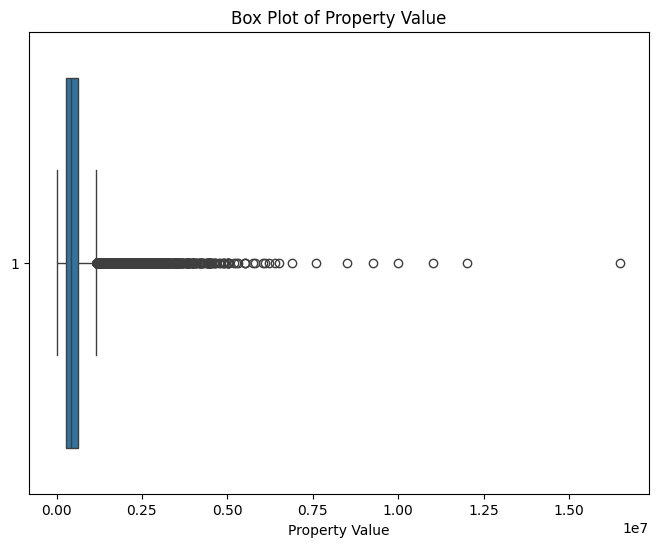

In [78]:
Property_Value_df = df[['property_value']]

plt.figure(figsize=(8, 6))
sns.boxplot(data=Property_Value_df, orient='h')  
plt.title('Box Plot of Property Value')
plt.xlabel('Property Value')
plt.yticks([0], ['1'])
plt.show()

<span style="font-size:20px; color:#06cda3;">Box Plot of Income</span>

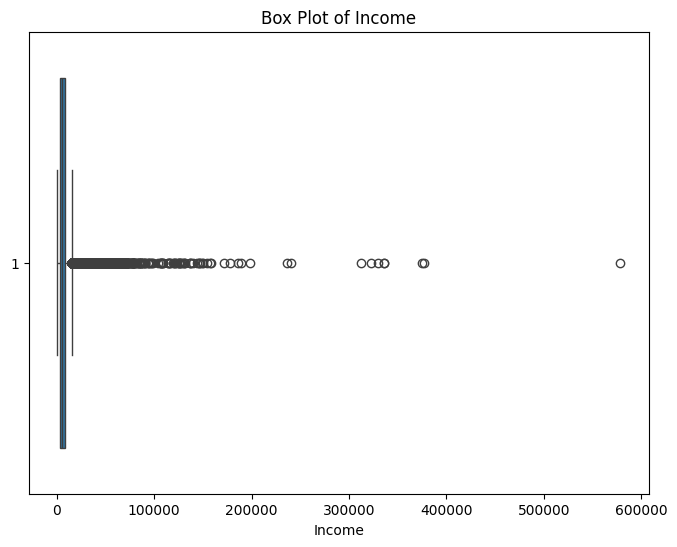

In [79]:
Income_df = df[['income']]

plt.figure(figsize=(8, 6))
sns.boxplot(data=Income_df, orient='h')  
plt.title('Box Plot of Income')
plt.xlabel('Income')
plt.yticks([0], ['1'])
plt.show()

<span style="font-size:20px; color:#06cda3;">Box PLot of Credit Scores Distribution</span>

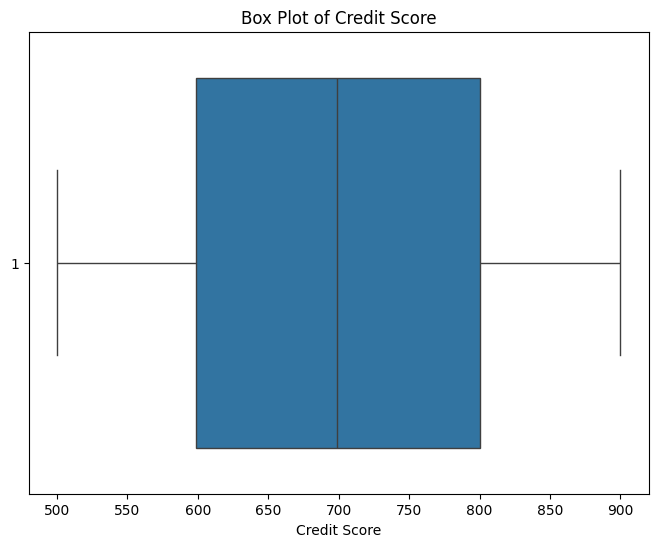

In [80]:
Credit_Score_df = df[['Credit_Score']]

plt.figure(figsize=(8, 6))
sns.boxplot(data=Credit_Score_df, orient='h')  
plt.title('Box Plot of Credit Score')
plt.xlabel('Credit Score')
plt.yticks([0], ['1'])
plt.show()

<span style="font-size:20px; color:#06cda3;">Box Plot of Loan To Value</span>

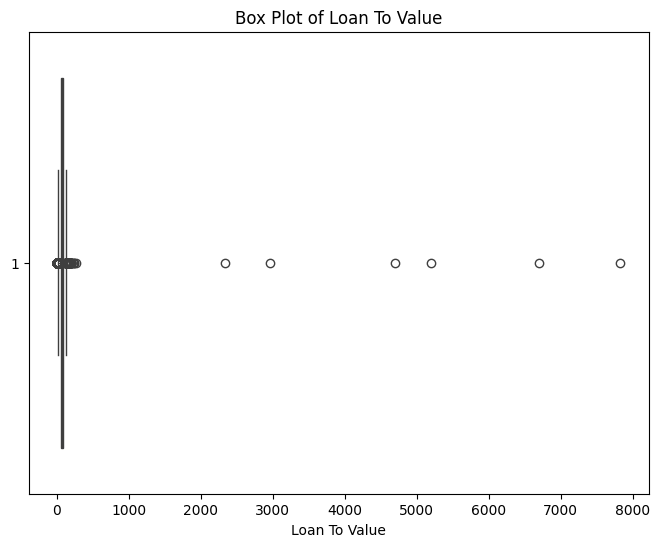

In [81]:
Loan_To_value_df = df[['LTV']]

plt.figure(figsize=(8, 6))
sns.boxplot(data=Loan_To_value_df, orient='h')  
plt.title('Box Plot of Loan To Value')
plt.xlabel('Loan To Value')
plt.yticks([0], ['1'])
plt.show()

<span style="font-size:20px; color:#06cda3;">Bar Chart of Status</span>

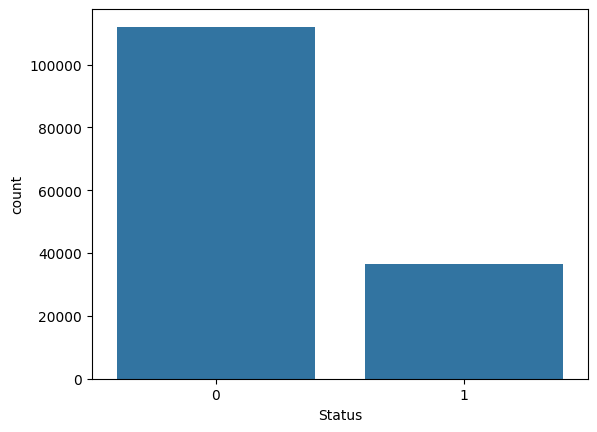

In [82]:
sns.countplot(data=df , x='Status')
plt.show()

<span style="font-size:20px; color:#06cda3;">Histogram of Debt To Income Ratio</span>

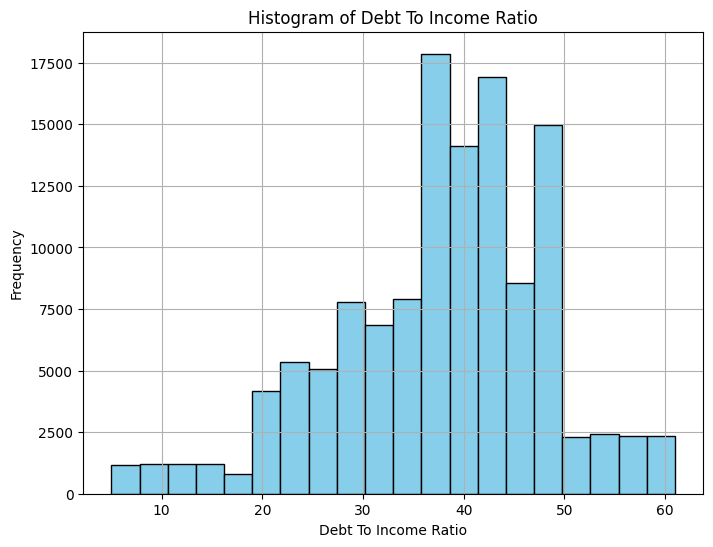

In [83]:
dti_data = df['dtir1']

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(dti_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Debt To Income Ratio')
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<span style="font-size:20px; color:#06cda3;">Count of the Target Variable</span>

In [84]:
df["Status"].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

<span style="font-size:20px; color:#06cda3;">Bar Plots for Each Categorical Column</span>

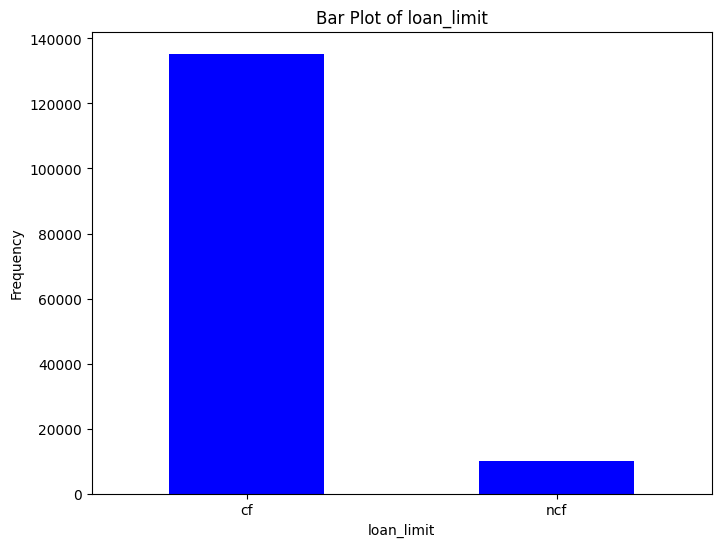

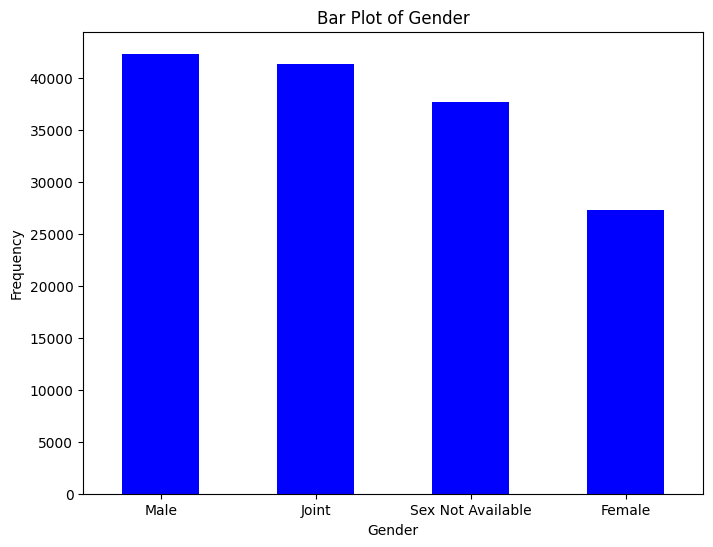

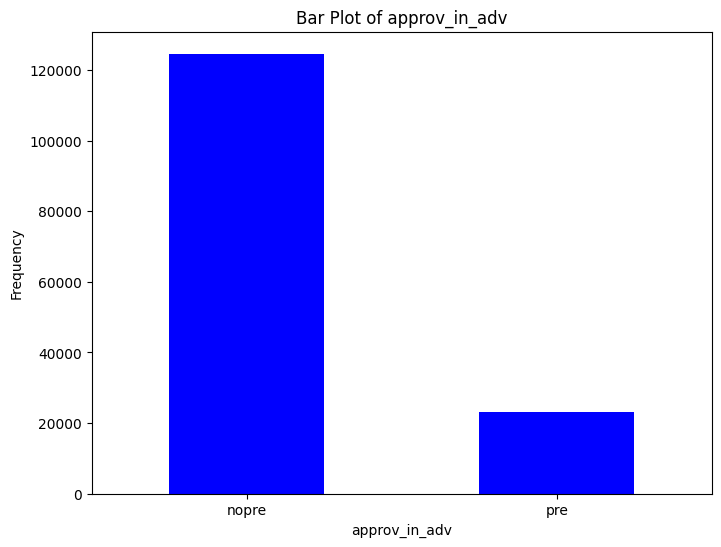

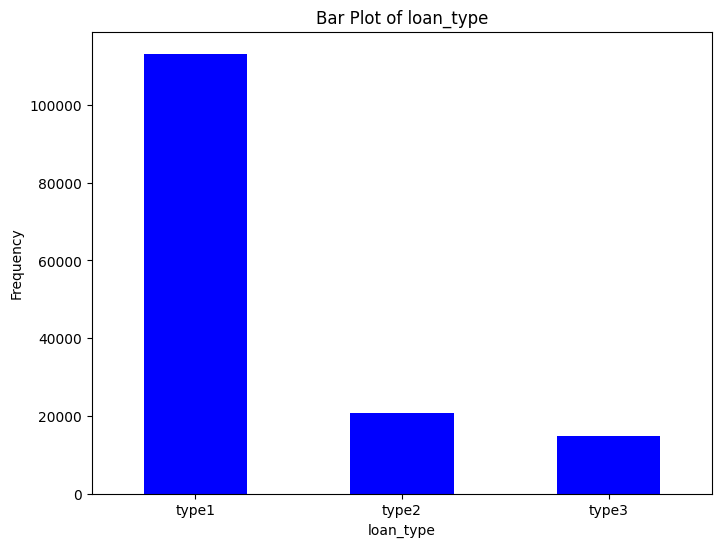

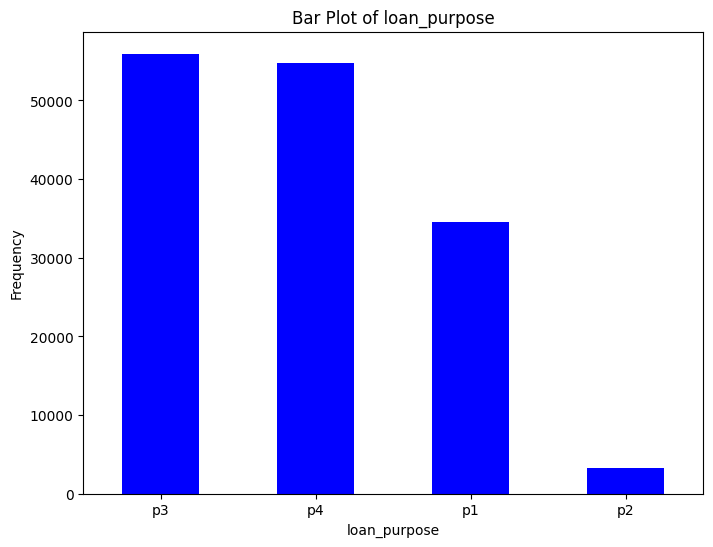

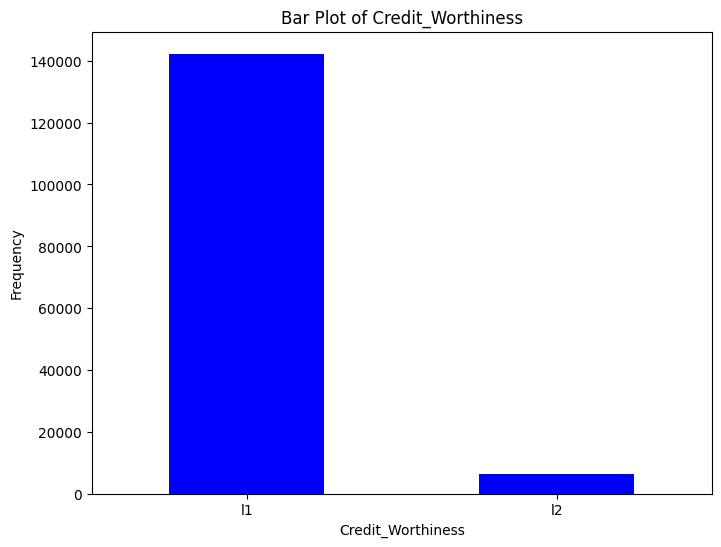

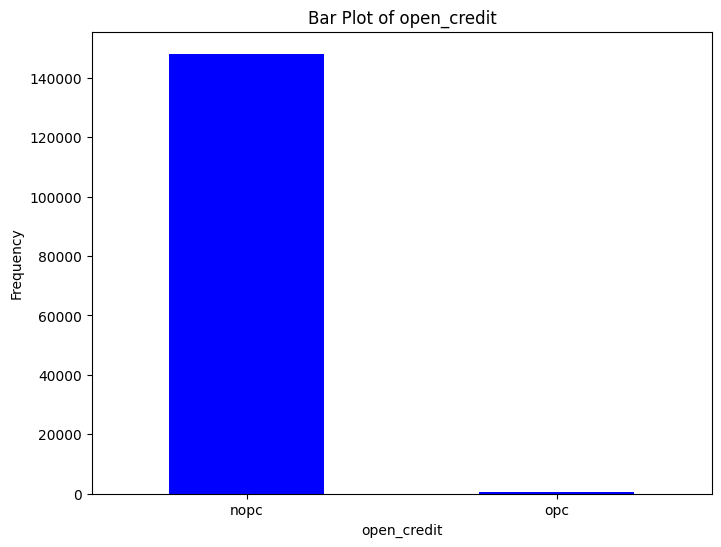

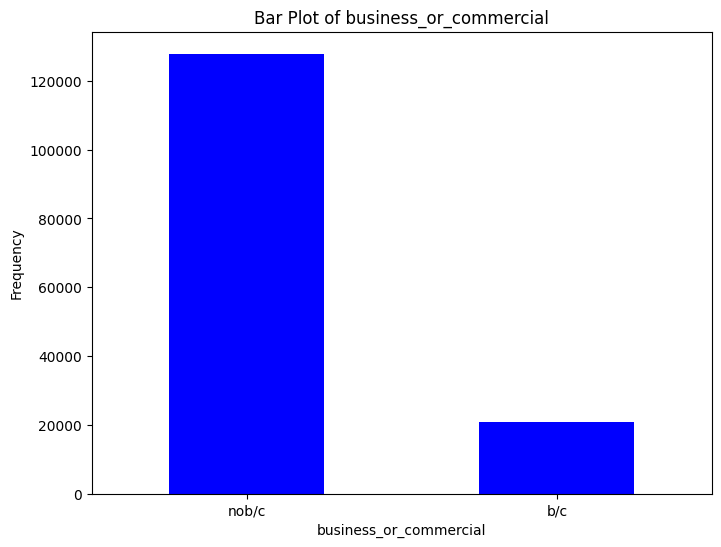

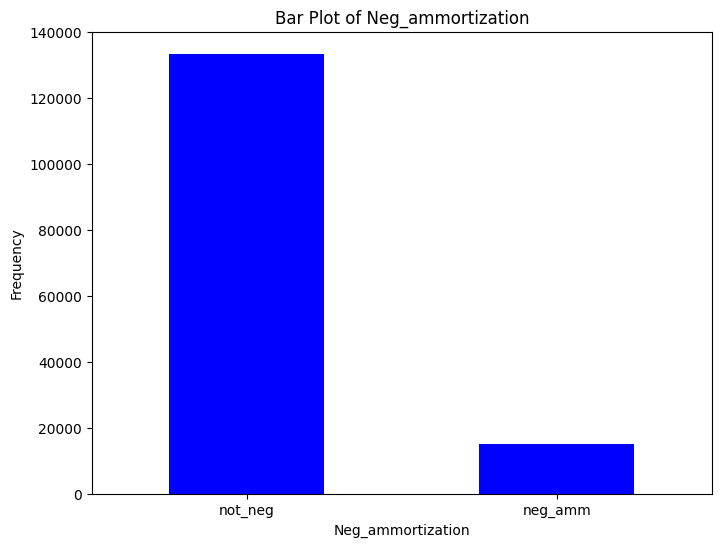

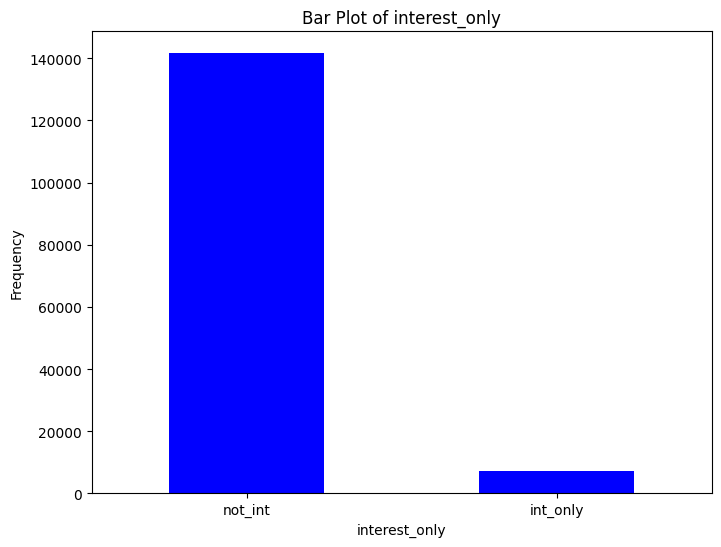

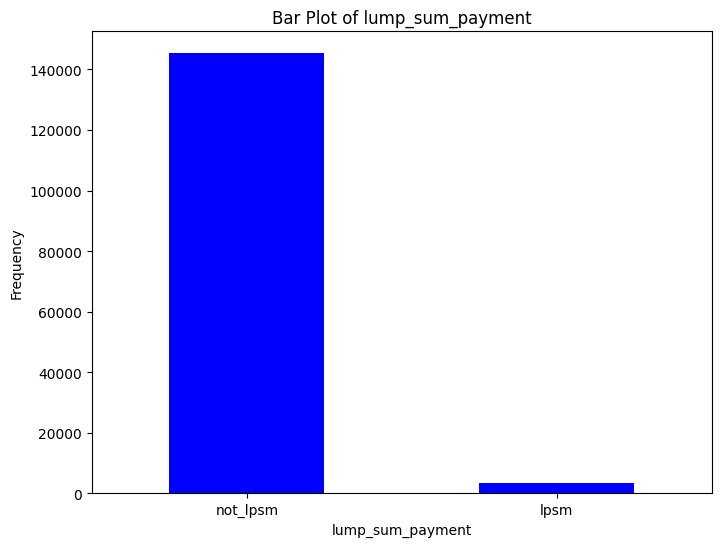

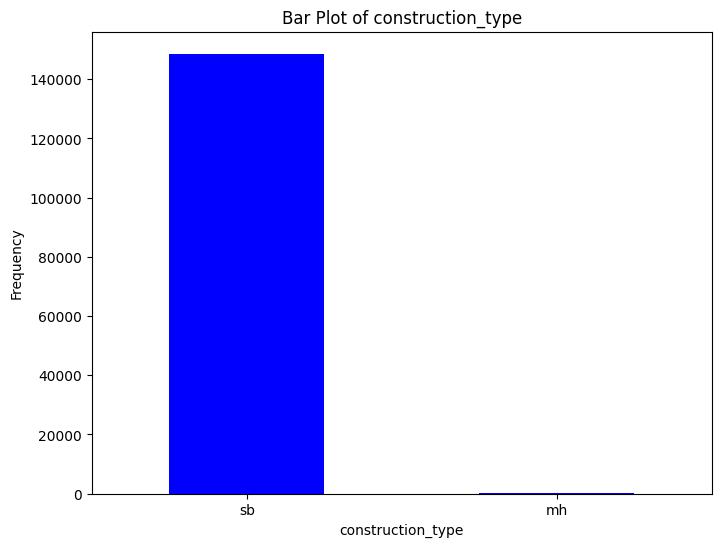

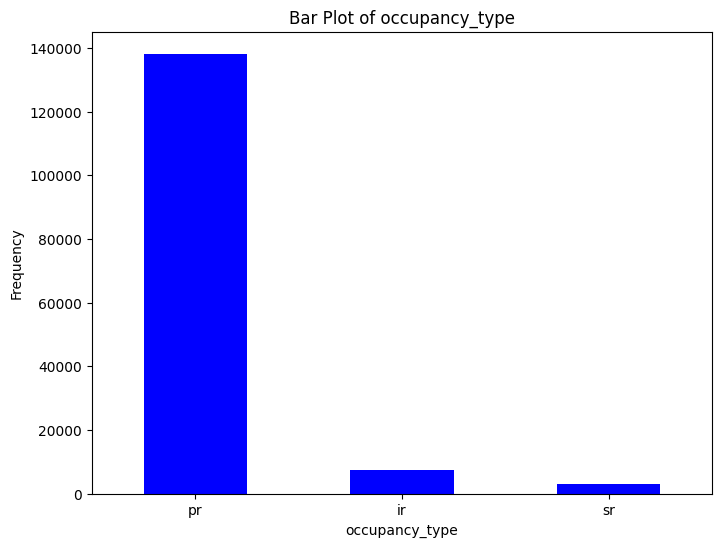

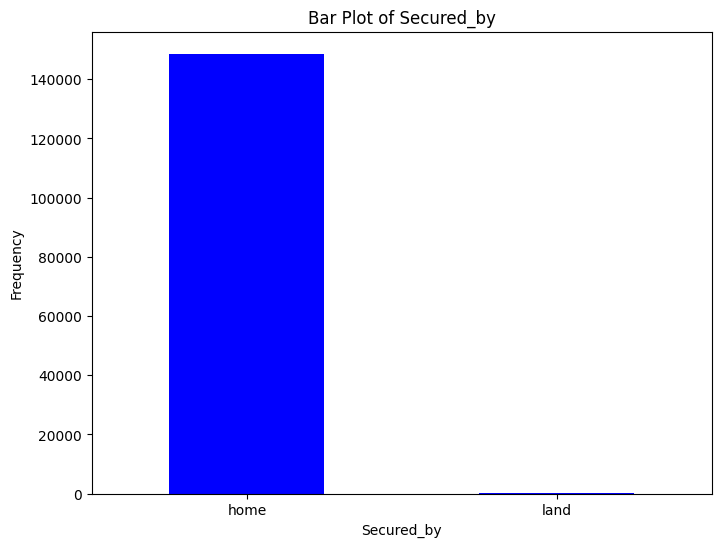

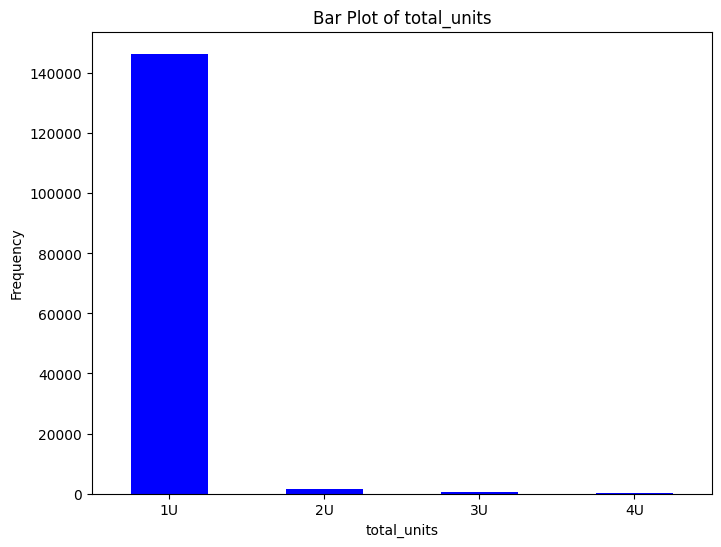

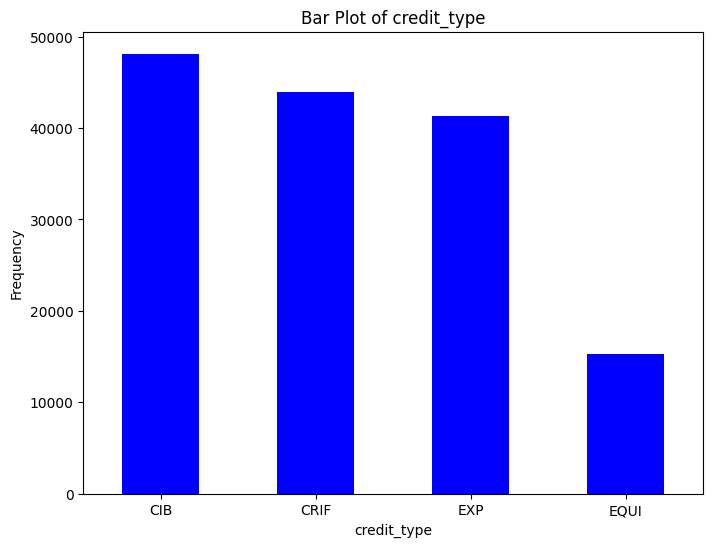

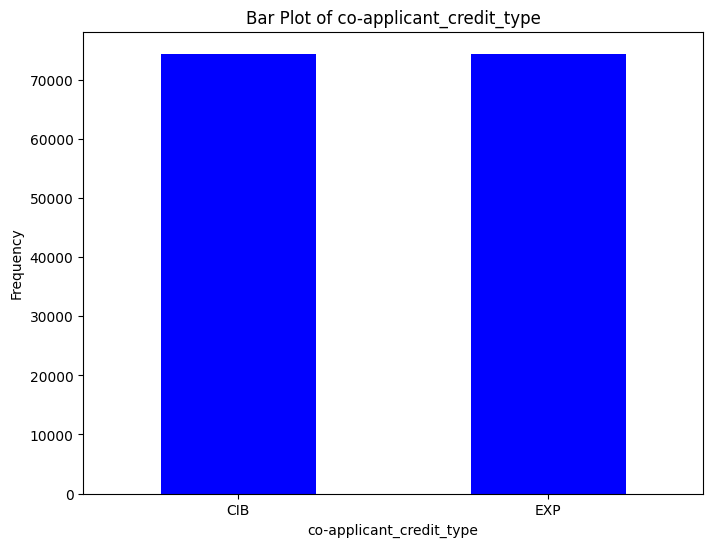

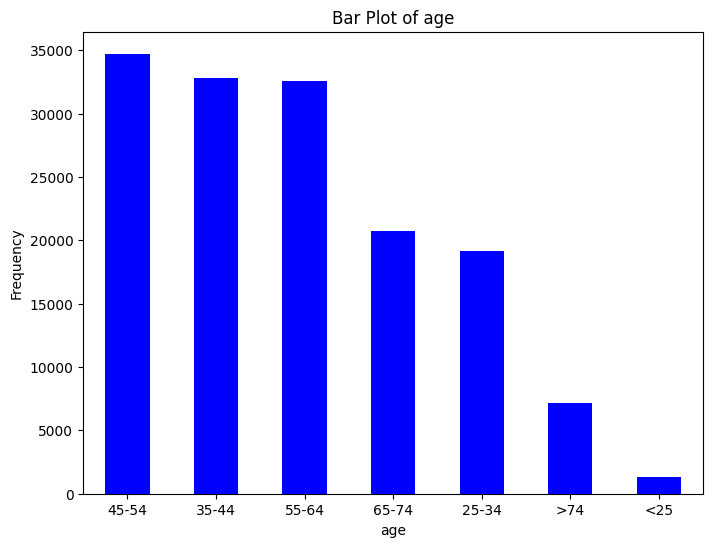

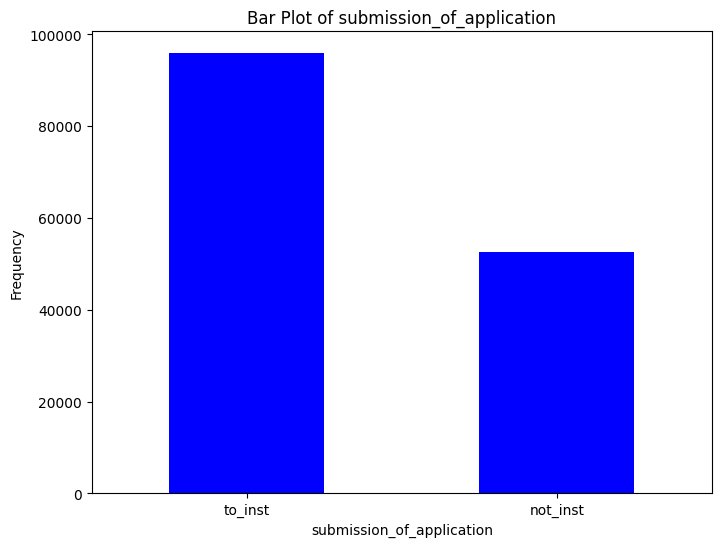

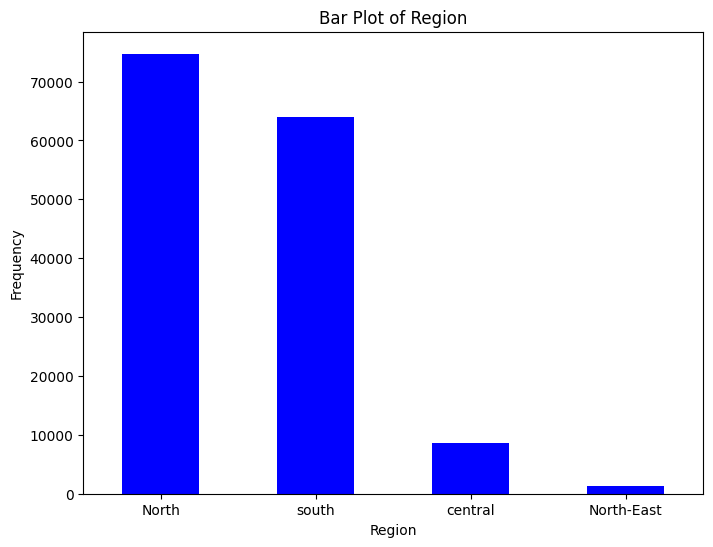

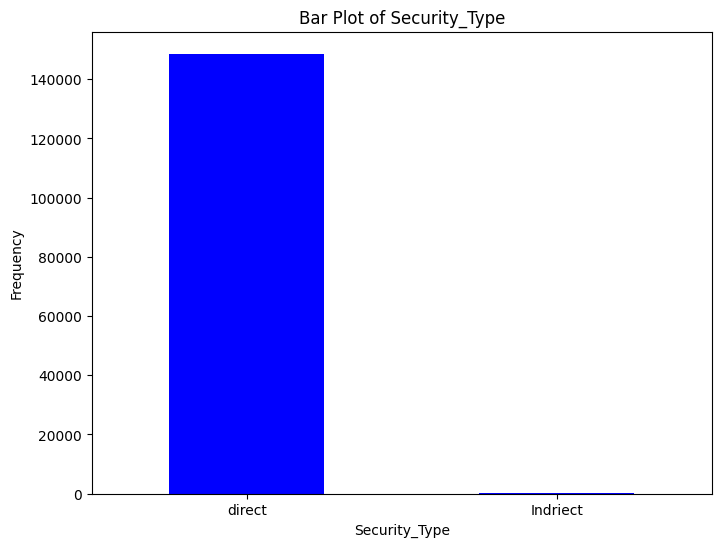

In [85]:
object_columns = df.select_dtypes(include=['object']).columns

# Plot each column with object dtype
for column in object_columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar', color='blue')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.show()

# Data Pre-Processing

<span style="font-size:20px; color:#06cda3;">Nullity Matrix (see the distribution of data across all columns in the whole dataset)</span>

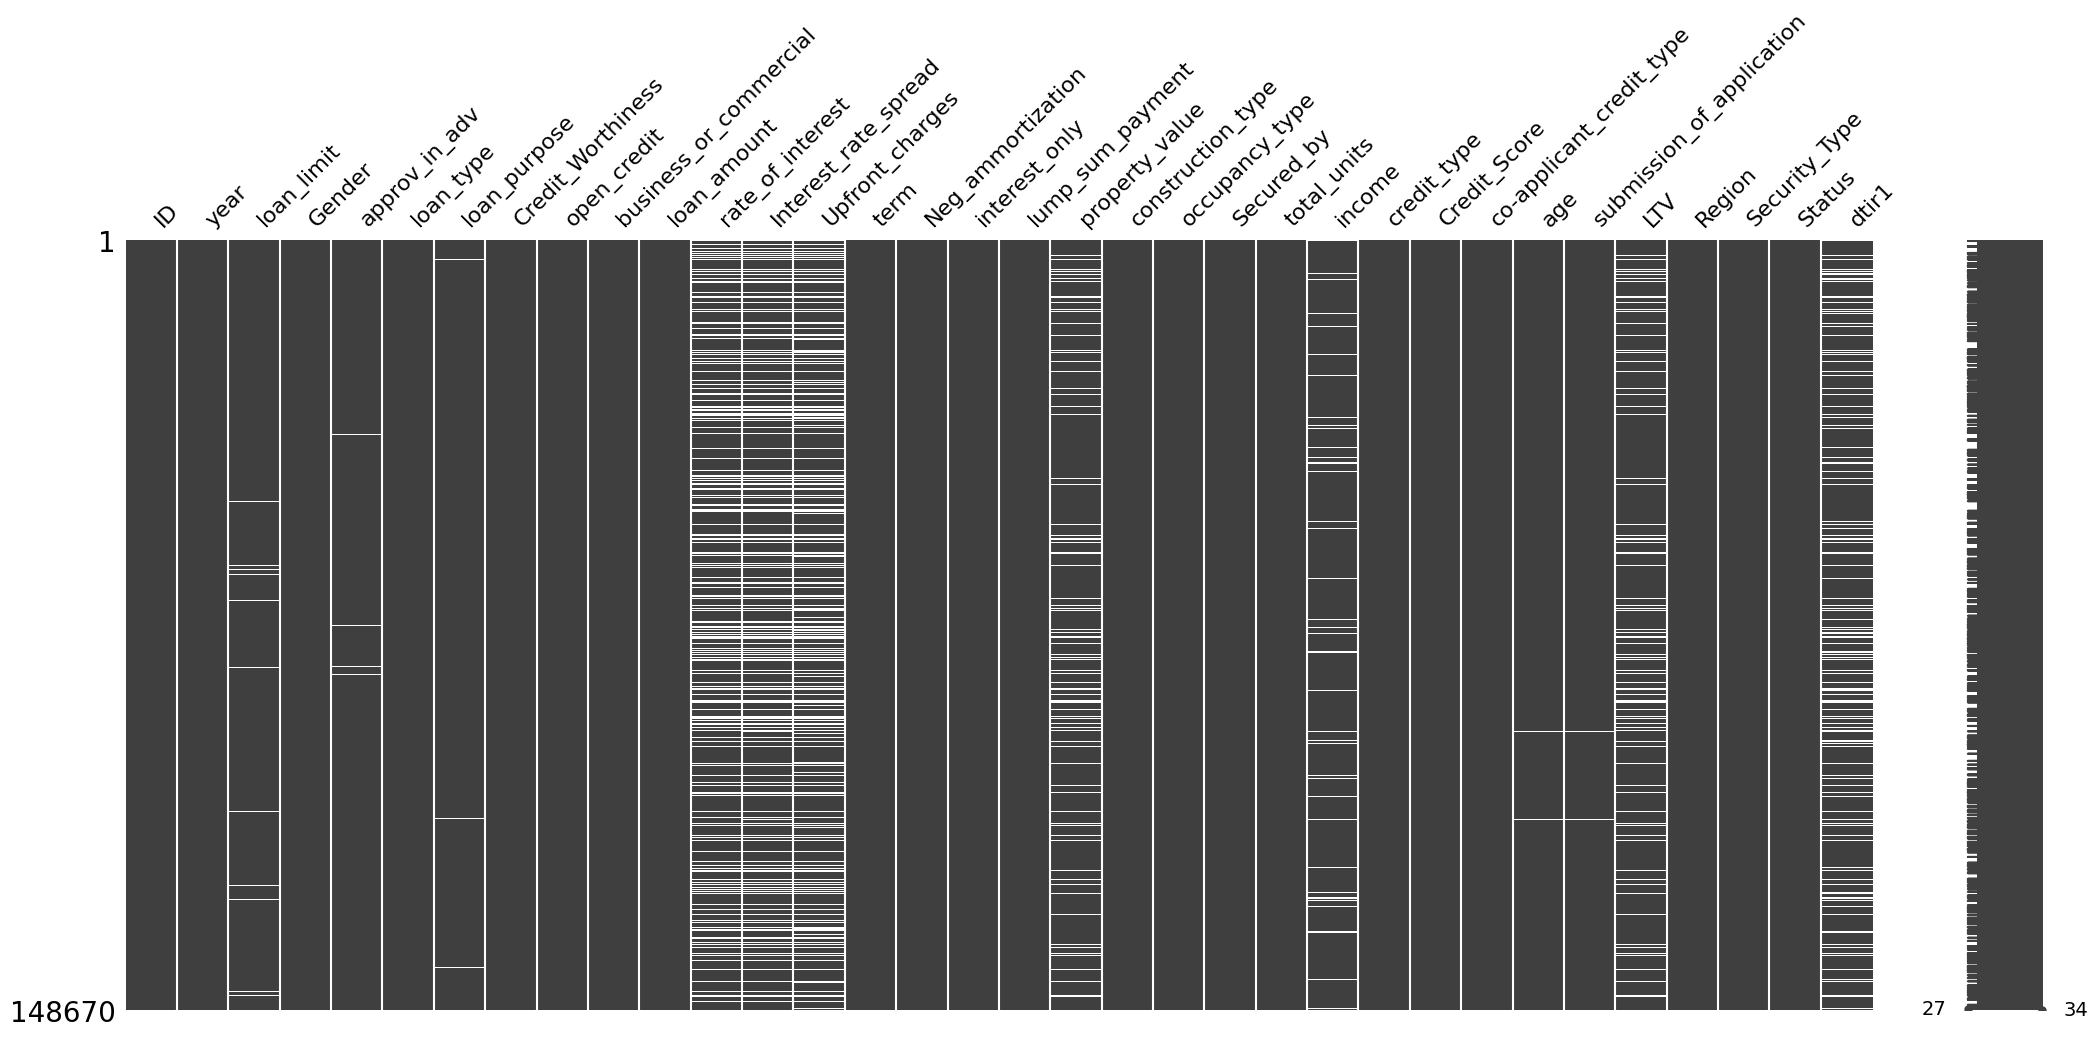

<Figure size 1500x900 with 0 Axes>

In [86]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

<span style="font-size:20px; color:#06cda3;">Drop Columns</span>

In [87]:
drop_columns = ["ID", "year","loan_type", "loan_purpose", "Credit_Worthiness", "construction_type", "occupancy_type", "Region",
                "credit_type", "co-applicant_credit_type", "submission_of_application", "Security_Type", "Secured_by", "approv_in_adv", 
                "business_or_commercial", "loan_limit", "interest_only", "total_units", "open_credit", "Gender", "age", "Neg_ammortization", "lump_sum_payment"]
df.drop(columns=drop_columns, inplace=True)
df.columns

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1'],
      dtype='object')

<span style="font-size:20px; color:#06cda3;">Check Missing Value</span>

In [88]:
# Calculate missing values and their percentages
missing_value_columns = df.isnull().sum()
missing_value_columns = missing_value_columns[missing_value_columns > 0]
missing_percentage = (missing_value_columns / len(df)) * 100

# Format the output as required
for col, missing_count in missing_value_columns.items():
    print(f"{col} : {missing_count} ({missing_percentage[col]:.4f}%)")

rate_of_interest : 36439 (24.5100%)
Interest_rate_spread : 36639 (24.6445%)
Upfront_charges : 39642 (26.6644%)
term : 41 (0.0276%)
property_value : 15098 (10.1554%)
income : 9150 (6.1546%)
LTV : 15098 (10.1554%)
dtir1 : 24121 (16.2245%)


<span style="font-size:20px; color:#06cda3;">Drop Loan To Value Ratio > 100</span>

In [89]:
count = df[df['LTV'] > 100]['LTV'].count()
print("Result:", count)

Result: 1799


In [90]:
index_to_drop = df[df['LTV'] > 100].index
df.drop(index_to_drop, inplace=True)
print("Number rows after removing LTV ratios > 100:", len(df))

Number rows after removing LTV ratios > 100: 146871


<span style="font-size:20px; color:#06cda3;">Remove rows with more than 5 missing values</span>

In [91]:
# Calculate the number of missing values in each row
df['missing_count'] = df.isnull().sum(axis=1)

# Set the threshold for deletion (more than 5 attributes)
threshold = 5

# Remove samples with missing values in more than 5 attributes
df = df[df['missing_count'] <= threshold].drop(columns=['missing_count'])

# Check the shape of the cleaned dataset
print( df.shape)

(131775, 11)


<span style="font-size:20px; color:#06cda3;">Check Missing Value</span>

In [92]:
# Calculate missing values and their percentages
missing_value_columns = df.isnull().sum()
missing_value_columns = missing_value_columns[missing_value_columns > 0]
missing_percentage = (missing_value_columns / len(df)) * 100

# Format the output as required
for col, missing_count in missing_value_columns.items():
    print(f"{col} : {missing_count} ({missing_percentage[col]:.4f}%)")

rate_of_interest : 20172 (15.3079%)
Interest_rate_spread : 20372 (15.4597%)
Upfront_charges : 23359 (17.7264%)
term : 29 (0.0220%)
property_value : 2 (0.0015%)
income : 8840 (6.7084%)
LTV : 2 (0.0015%)
dtir1 : 8731 (6.6257%)


<span style="font-size:20px; color:#06cda3;">Remove rows with Less Than 10% Missing Values</span>

In [93]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Identify columns where missing value percentage is less than 10%
columns_to_drop_rows = missing_percentage[missing_percentage < 10].index

# Drop rows with missing values in these columns
df.dropna(subset=columns_to_drop_rows, inplace=True)

# Check remaining missing values and their percentages
remaining_missing_values = df.isnull().sum()
remaining_missing_percentage = (remaining_missing_values / len(df)) * 100
remaining_missing_info = remaining_missing_values[remaining_missing_values > 0]

# Print remaining missing values along with their percentages
print("Remaining missing values after dropping rows in selected columns:")
for col in remaining_missing_info.index:
    print(f"{col} : {remaining_missing_info[col]} ({remaining_missing_percentage[col]:.4f}%)")

Remaining missing values after dropping rows in selected columns:
rate_of_interest : 19308 (15.7098%)
Interest_rate_spread : 19308 (15.7098%)
Upfront_charges : 22083 (17.9677%)


<span style="font-size:20px; color:#06cda3;">Convert 'Term' Column from Float64 to Int</span>

In [94]:
# Convert 'term' column from float64 to int
df['term'] = df['term'].astype(int)

<span style="font-size:20px; color:#06cda3;">Model Imputation (Handling Missing Values)</span>

In [95]:
dr = DecisionTreeRegressor()

In [96]:
def tree_imputation(df):
    missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
    non_missing_cols = [col for col in df.columns if df[col].isnull().sum() == 0]

    for col in missing_cols:
        model = BaggingRegressor(DecisionTreeRegressor(), n_estimators=40, max_samples=1.0, max_features=1.0, bootstrap=False, n_jobs=-1)

        col_missing = df[df[col].isnull()]
        temp = df.drop(df[df[col].isnull()].index, axis=0)

        X = temp.loc[:, non_missing_cols]
        y = temp[col]

        model.fit(X, y)

        y_pred = model.predict(col_missing[non_missing_cols])
        df.loc[col_missing.index, col] = y_pred
    return df

df = tree_imputation(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122904 entries, 0 to 148669
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amount           122904 non-null  int64  
 1   rate_of_interest      122904 non-null  float64
 2   Interest_rate_spread  122904 non-null  float64
 3   Upfront_charges       122904 non-null  float64
 4   term                  122904 non-null  int32  
 5   property_value        122904 non-null  float64
 6   income                122904 non-null  float64
 7   Credit_Score          122904 non-null  int64  
 8   LTV                   122904 non-null  float64
 9   Status                122904 non-null  int64  
 10  dtir1                 122904 non-null  float64
dtypes: float64(7), int32(1), int64(3)
memory usage: 14.8 MB


<span style="font-size:20px; color:#06cda3;">Correlation Heatmap</span>

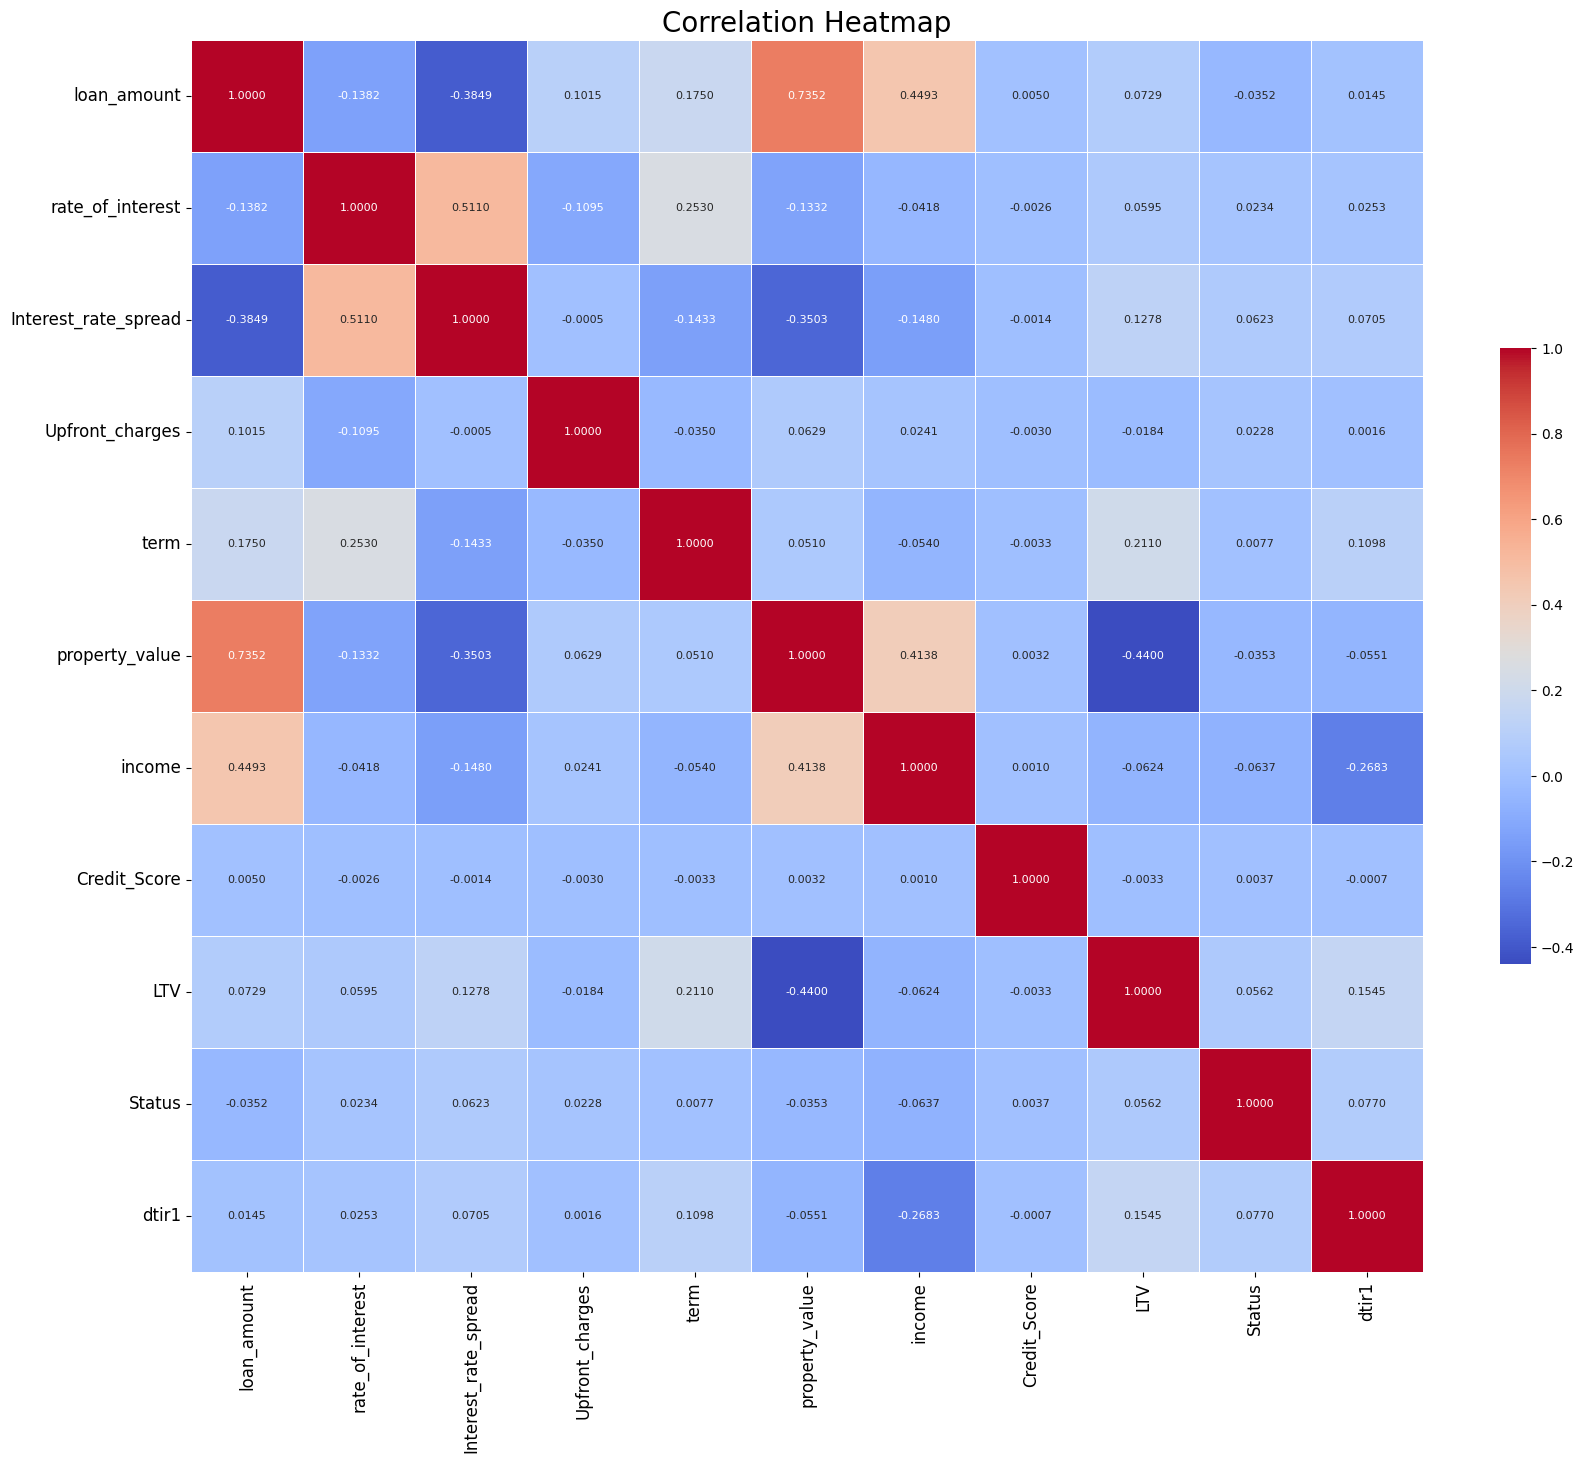

col0 = loan_amount
col1 = rate_of_interest
col2 = Interest_rate_spread
col3 = Upfront_charges
col4 = term
col5 = property_value
col6 = income
col7 = Credit_Score
col8 = LTV
col9 = Status
col10 = dtir1


In [97]:
# Create a dictionary mapping the generic column names to the original column names
original_column_names = ['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']

# Calculate the correlation matrix using the full DataFrame
corr_matrix = df.corr()

# Set up the matplotlib figure with increased size
plt.figure(figsize=(20, 16))

# Draw the heatmap with larger annotations and labels
sns.heatmap(corr_matrix, annot=True, fmt='.4f', cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 8})

# Update the axis labels with the original column names
plt.xticks(ticks=np.arange(len(df.columns)) + 0.5, labels=original_column_names, fontsize=12, rotation=90)
plt.yticks(ticks=np.arange(len(df.columns)) + 0.5, labels=original_column_names, fontsize=12)

# Add title with increased font size
plt.title('Correlation Heatmap', fontsize=20)

# Show the plot
plt.show()

# Print out the column labels for reference
column_labels = {f'col{i}': original_column_names[i] for i in range(len(original_column_names))}
for key, value in column_labels.items():
    print(f'{key} = {value}')

<span style="font-size:20px; color:#06cda3;">Updated Column Names</span>

In [98]:
df.rename(columns={
    "LTV": "Loan_To_Value",
    "dtir1": "Debt_To_Income_Ratio"
}, inplace=True)

df.columns

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'Loan_To_Value', 'Status', 'Debt_To_Income_Ratio'],
      dtype='object')

<span style="font-size:20px; color:#06cda3;">Hybrid Balancing Techniques</span>

In [99]:
df["Status"].value_counts()

Status
0    103596
1     19308
Name: count, dtype: int64

In [100]:
X = df.drop('Status', axis=1)
y = df['Status']

# Define undersampling and SMOTE techniques
undersample = RandomUnderSampler(sampling_strategy=0.3, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply undersampling to reduce the majority class
X_undersampled, y_undersampled = undersample.fit_resample(X, y)

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X_undersampled, y_undersampled)

# Convert the resampled data back to DataFrame for convenience
df = pd.DataFrame(X_resampled, columns=X.columns)
df['Status'] = y_resampled

# Display the class distribution after resampling
print("Class distribution before resampling:")
print(y.value_counts())
print("\nClass distribution after resampling:")
print(df['Status'].value_counts())

Class distribution before resampling:
Status
0    103596
1     19308
Name: count, dtype: int64

Class distribution after resampling:
Status
0    64360
1    64360
Name: count, dtype: int64


# Data Understanding (After Pre-Processing)

<span style="font-size:20px; color:#06cda3;">Data Understanding (After Pre-Processing)</span>

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128720 entries, 0 to 128719
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amount           128720 non-null  int64  
 1   rate_of_interest      128720 non-null  float64
 2   Interest_rate_spread  128720 non-null  float64
 3   Upfront_charges       128720 non-null  float64
 4   term                  128720 non-null  int32  
 5   property_value        128720 non-null  float64
 6   income                128720 non-null  float64
 7   Credit_Score          128720 non-null  int64  
 8   Loan_To_Value         128720 non-null  float64
 9   Debt_To_Income_Ratio  128720 non-null  float64
 10  Status                128720 non-null  int64  
dtypes: float64(7), int32(1), int64(3)
memory usage: 10.3 MB


<span style="font-size:20px; color:#06cda3;">Analyzing Numerical Columns</span>

In [102]:
df.describe()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,Loan_To_Value,Debt_To_Income_Ratio,Status
count,1.287200e+05,128720.000000,128720.000000,128720.000000,128720.000000,1.287200e+05,128720.000000,128720.000000,128720.000000,128720.000000,128720.000000
mean,3.228264e+05,4.106707,0.516209,3451.126680,334.181029,4.917284e+05,6546.291739,700.107505,72.099344,38.600773,0.500000
std,1.966056e+05,0.527842,0.488469,3172.891571,55.939713,3.980970e+05,6570.256189,109.448049,18.784846,10.674800,0.500002
min,1.650000e+04,1.306250,-3.638000,0.000000,96.000000,1.800000e+04,0.000000,500.000000,0.967478,5.000000,0.000000
25%,1.865000e+05,3.750000,0.152830,1106.168167,360.000000,2.580000e+05,3420.000000,609.000000,60.210396,32.000000,0.000000
50%,2.865000e+05,4.001478,0.459400,2859.244750,360.000000,3.980000e+05,5325.756912,700.000000,75.201613,40.000000,0.500000
75%,4.265000e+05,4.498625,0.846700,4912.500000,360.000000,6.080000e+05,7980.000000,791.000000,85.899654,46.000000,1.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,99.814356,61.000000,1.000000


<span style="font-size:20px; color:#06cda3;">Box Plot of Loan Amount</span>

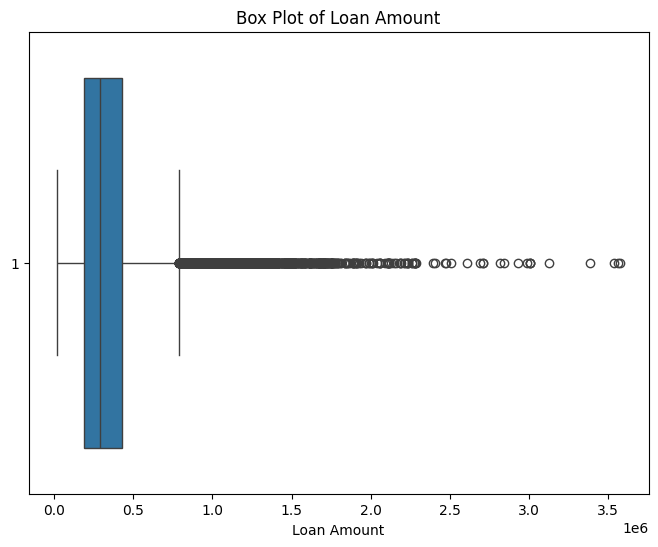

In [103]:
loan_amount_df = df[['loan_amount']]

plt.figure(figsize=(8, 6))
sns.boxplot(data=loan_amount_df, orient='h')  
plt.title('Box Plot of Loan Amount')
plt.xlabel('Loan Amount')
plt.yticks([0], ['1'])
plt.show()

<span style="font-size:20px; color:#06cda3;">Box Plot of Rate of Interest</span>

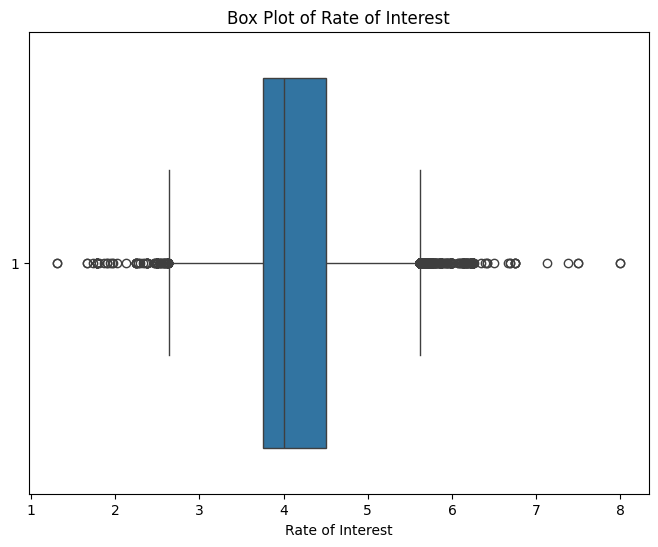

In [104]:
Rate_of_Interest_df = df[['rate_of_interest']]

plt.figure(figsize=(8, 6))
sns.boxplot(data=Rate_of_Interest_df, orient='h')  
plt.title('Box Plot of Rate of Interest')
plt.xlabel('Rate of Interest')
plt.yticks([0], ['1'])
plt.show()


<span style="font-size:20px; color:#06cda3;">Box Plot of Interest Rate Spread</span>

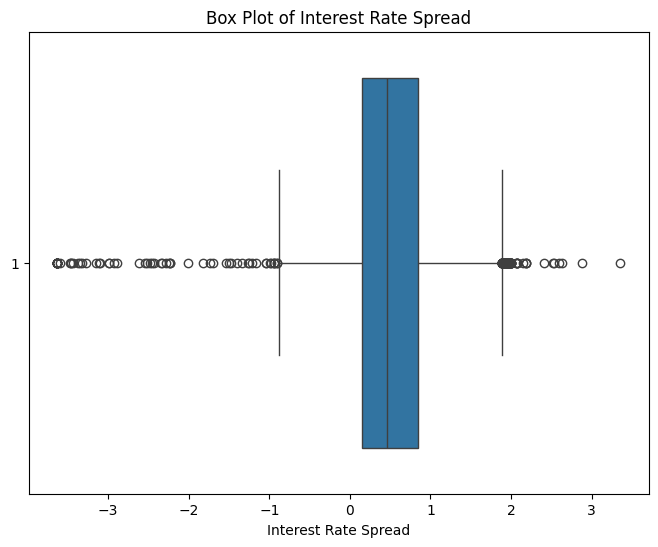

In [105]:
Interest_rate_spread_df = df[['Interest_rate_spread']]

plt.figure(figsize=(8, 6))
sns.boxplot(data=Interest_rate_spread_df, orient='h')  
plt.title('Box Plot of Interest Rate Spread')
plt.xlabel('Interest Rate Spread')
plt.yticks([0], ['1'])
plt.show()

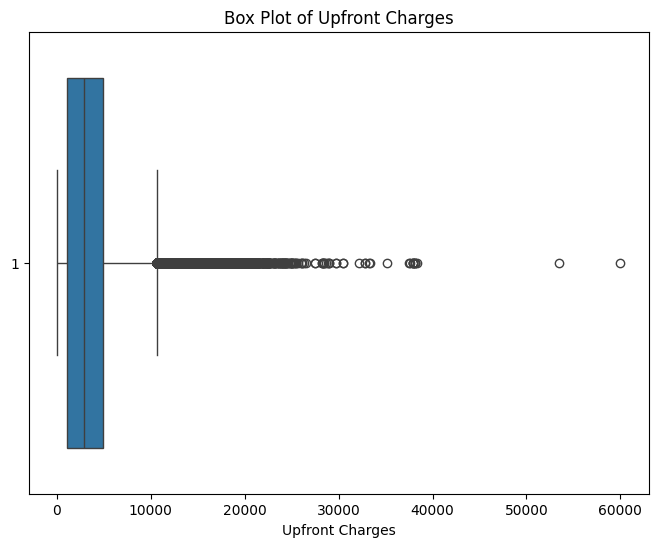

In [106]:
Loan_To_value_df = df[['Upfront_charges']]

plt.figure(figsize=(8, 6))
sns.boxplot(data=Loan_To_value_df, orient='h')  
plt.title('Box Plot of Upfront Charges')
plt.xlabel('Upfront Charges')
plt.yticks([0], ['1'])
plt.show()

<span style="font-size:20px; color:#06cda3;">Box Plot of Property Value</span>

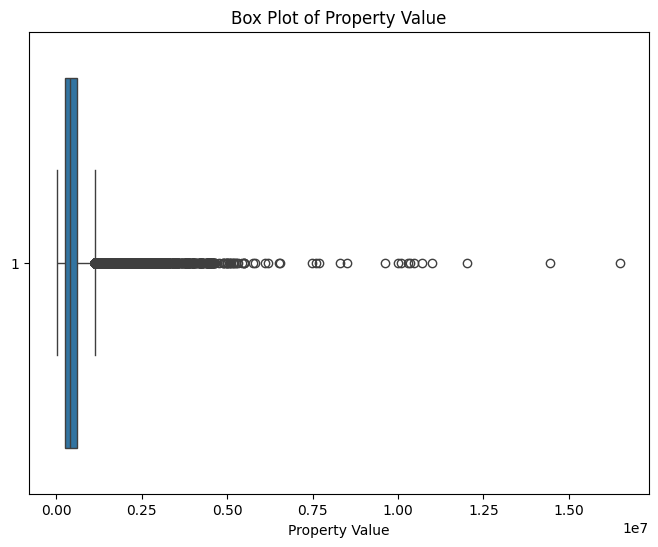

In [107]:
Property_Value_df = df[['property_value']]

plt.figure(figsize=(8, 6))
sns.boxplot(data=Property_Value_df, orient='h')  
plt.title('Box Plot of Property Value')
plt.xlabel('Property Value')
plt.yticks([0], ['1'])
plt.show()

<span style="font-size:20px; color:#06cda3;">Box Plot of Income</span>

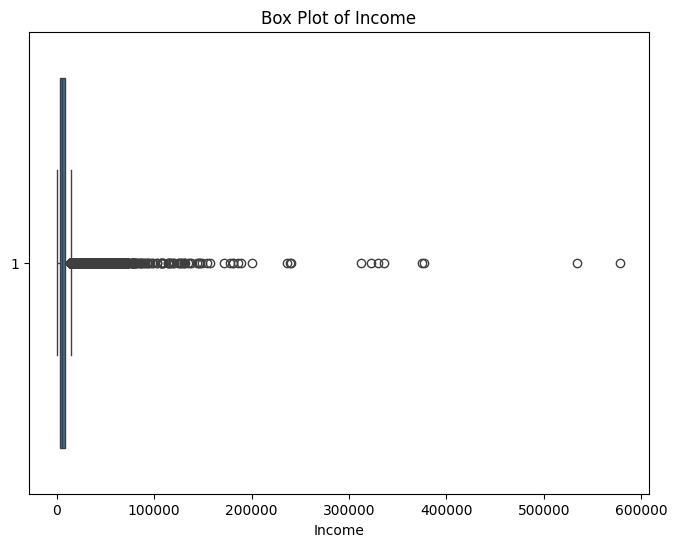

In [108]:
Income_df = df[['income']]

plt.figure(figsize=(8, 6))
sns.boxplot(data=Income_df, orient='h')  
plt.title('Box Plot of Income')
plt.xlabel('Income')
plt.yticks([0], ['1'])
plt.show()

<span style="font-size:20px; color:#06cda3;">Histogram of Term</span>

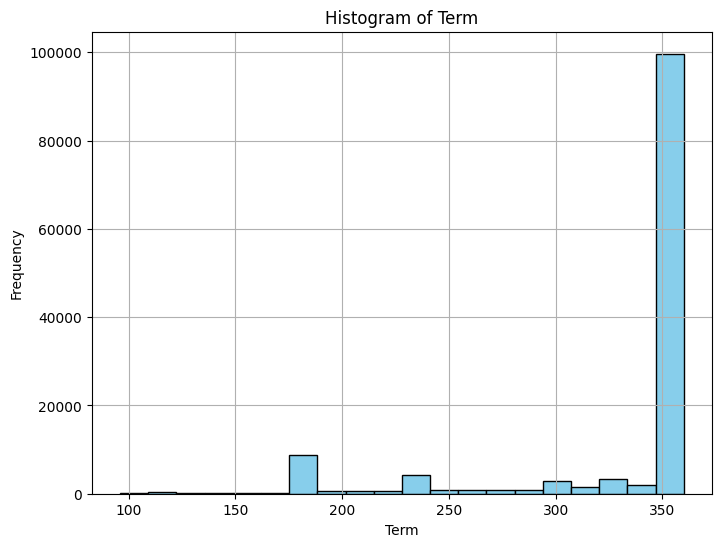

In [109]:
dti_data = df['term']

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(dti_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Term')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<span style="font-size:20px; color:#06cda3;">Distribution of Credit Scores</span>

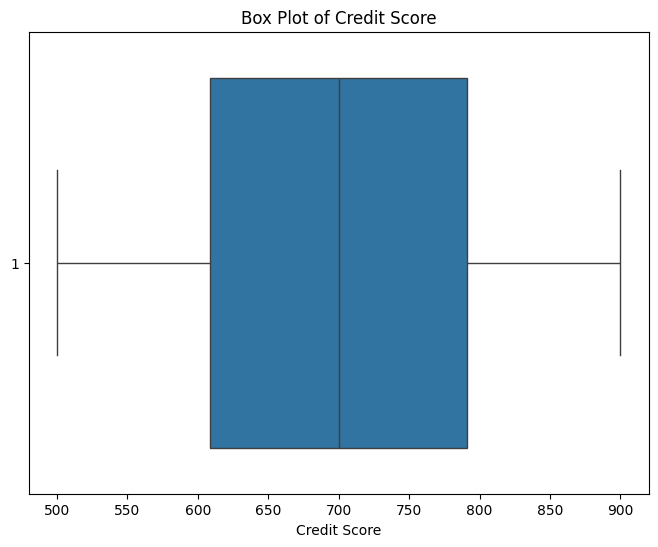

In [110]:
Credit_Score_df = df[['Credit_Score']]

plt.figure(figsize=(8, 6))
sns.boxplot(data=Credit_Score_df, orient='h')  
plt.title('Box Plot of Credit Score')
plt.xlabel('Credit Score')
plt.yticks([0], ['1'])
plt.show()

<span style="font-size:20px; color:#06cda3;">Histogram of Debt To Income Ratio</span>

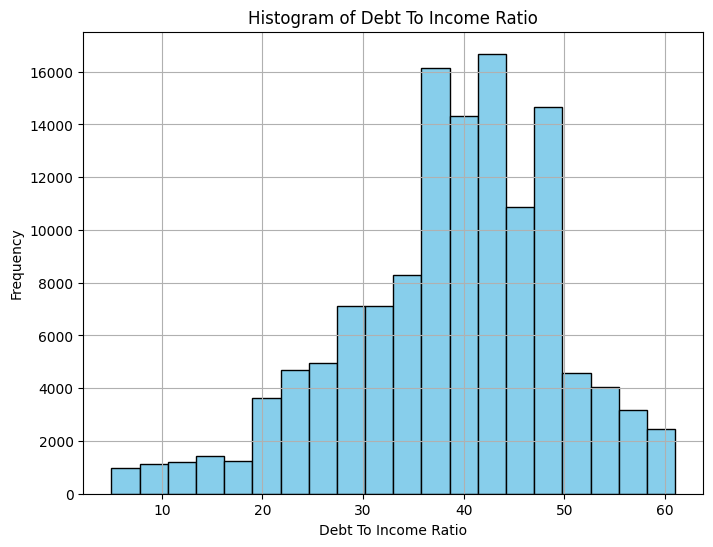

In [111]:
dti_data = df['Debt_To_Income_Ratio']

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(dti_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Debt To Income Ratio')
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<span style="font-size:20px; color:#06cda3;">Bar Chart of Status</span>

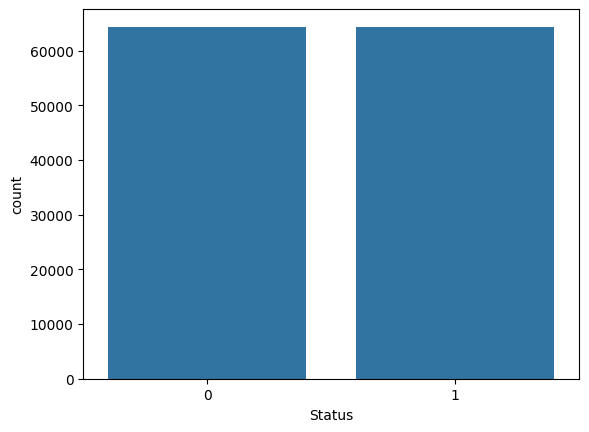

In [112]:
sns.countplot(data=df , x='Status')
plt.show()

<span style="font-size:20px; color:#06cda3;">Box Plot of Loan To Value</span>

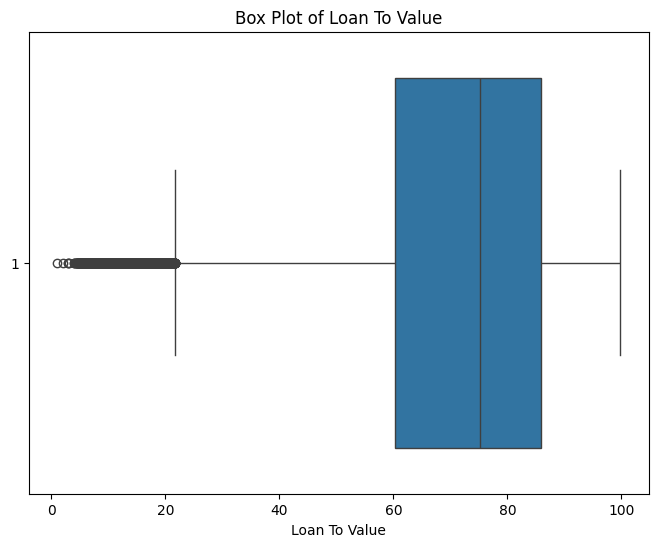

In [113]:
Loan_To_value_df = df[['Loan_To_Value']]

plt.figure(figsize=(8, 6))
sns.boxplot(data=Loan_To_value_df, orient='h')  
plt.title('Box Plot of Loan To Value')
plt.xlabel('Loan To Value')
plt.yticks([0], ['1'])
plt.show()

In [114]:
# # Specify the file name
# output_file = 'C:\\Users\\Chai\\Desktop\\FYP_dataset\\preprocessed_data.xlsx'

# # Export the DataFrame to an Excel file
# df.to_excel(output_file, index=False)

# print(f"Preprocessed data has been exported to {output_file}")